In [2]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [5]:
df = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')
df.shape

(404290, 6)

In [65]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
92429,92429,154741,154742,Where can I find a free ready-made Android for...,Where can I find free ready made Android style...,0
29454,29454,44763,54491,What do Americans think of Edward Snowden?,How do the Americans think of Edward Snowden?,1
135639,135639,216548,216549,What are the disadvantages of sleeping on an a...,How can you sleep comfortably on an air mattre...,0
152668,152668,239810,239811,Can I play GTA V in windows 8.1 intel corei3 4...,Can I run gta 5 on my laptop?,0
49089,49089,87406,87407,What are some signs that someone is trustworth...,What are some signs that someone is not trustw...,1
347066,347066,55675,475493,How can I unhide people I searched in instagram?,Does Instagram pop the people you search the m...,0
167230,167230,259299,259300,How can I earn money from the internet for free?,How do I earn money on the internet for free?,1
141251,141251,79519,136200,Can anyone read minds?,How do I read peoples mind?,1
92548,92548,154930,154931,"If Captain America had children, would they be...",Which comics have Captain America used his new...,0
149287,149287,9561,235192,What is the difference between a motif and a d...,What are the different biochemical markers for...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [10]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [23]:
df.duplicated().sum()  # checking if some row is completely duplicate or not

0

In [24]:
df['is_duplicate'].count() # returns the number of non-missing (non-NaN) values

404290

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

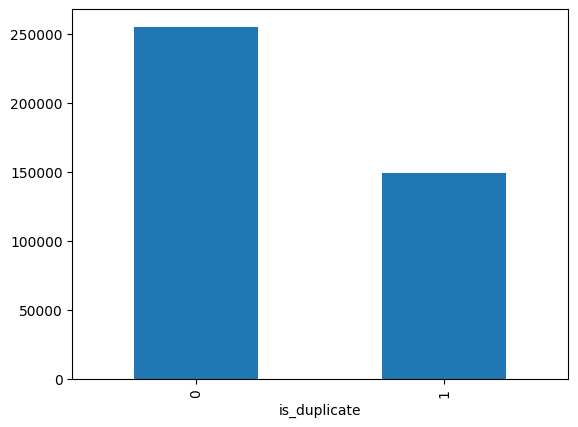

In [26]:
# distribution of duplicate and non duplicate questions

print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts() / df['is_duplicate'].count()*100)

df['is_duplicate'].sum()


df['is_duplicate'].value_counts().plot(kind = 'bar')

In [54]:
# Total UNIQUE questions (across both qid1 and qid2)

unique_questions = pd.Series(df['qid1'].tolist() + df['qid2'].tolist()).nunique()
print("Total unique questions:", unique_questions)

# pd.Series(df['qid1'].tolist() + ..... ) Combines qid1 and qid2 into one long list
# nunique() counts unique question IDs

Total unique questions: 537933


In [55]:
# Total DUPLICATED question IDs (ones that appear more than once)

qid_series = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
duplicated_questions = (qid_series.value_counts() > 1).sum()
print("Total duplicated questions:", duplicated_questions)


Total duplicated questions: 111780


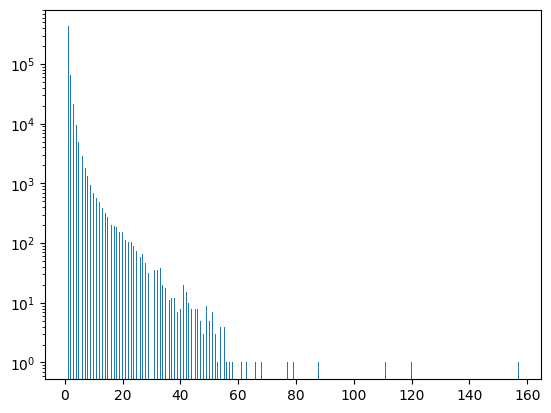

In [64]:
# Repeated questions histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(qid_series.value_counts().values,bins=500) # X-axis -> how many times a question appears across the dataset and y-axis shows How many qids appear that many times. for eg: leftmost histogram bar means Number of question IDs that appear ONE time in the dataset
plt.yscale('log') # number of question IDs that appear that many times
plt.show()

### example of how that histogram works

| row | qid1 | qid2 |
|-----|------|------|
| 1   | 1    | 2    |
| 2   | 3    | 4    |
| 3   | 1    | 3    |
| 4   | 5    | 1    |
| 5   | 6    | 3    |
| 6   | 7    | 8    |


🟦 Step 1 — Combine qid1 + qid2
qid_series = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())


Combined list becomes:

qid_series = [1, 3, 1, 5, 6, 7, 2, 4, 3, 1, 3, 8]

🟦 Step 2 — Count how many times each qid appears

qid_series.value_counts()

This gives:

qid	appears (frequency)
1	3 times
3	3 times
5	1 time
6	1 time
7	1 time
2	1 time
4	1 time
8	1 time

So:

qid_series.value_counts().values = [3,3,1,1,1,1,1,1]

🟦 Step 3 — This becomes the X-axis of your histogram
X-axis = frequency values

→ how many times a question appears across the dataset

So X-axis contains:

[3, 3, 1, 1, 1, 1, 1, 1]


There is no qid here — only frequencies.

🟦 Step 4 — What the Histogram Shows

You plot:

plt.hist(qid_series.value_counts().values, bins=500)

Histogram meaning:
X-axis value	Meaning
1	question IDs that appear 1 time
3	question IDs that appear 3 times
Y-axis value:

How many qids appear that many times.

🟦 Final Interpretation

Using our example:

✔ 1 and 3 appear 3 times each
✔ 2,4,5,6,7,8 appear 1 time each

So histogram shows:

For X = 1

Y = 6 (because 6 question IDs appear once)

For X = 3

Y = 2 (because qid 1 and qid 3 appear 3 times)